In [38]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

houses_train = pd.read_csv('train.csv')
# Keep only numerical data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
houses_train = houses_train.select_dtypes(numerics).dropna(axis=1)
houses_train.reset_index()
print(houses_train.shape)
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
Y = houses_train['SalePrice']
X = houses_train.drop(['SalePrice'], axis=1)
fit = selector.fit_transform(X, Y)
cols_idxs = selector.get_support(indices=True)
features_df_new = houses_train.iloc[:,cols_idxs]
print(features_df_new.columns.values)
indices = np.argsort(selector.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(k):
    features.append(houses_train.columns[indices[i]])
print(features)

(1460, 35)
['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF' 'GrLivArea' 'BsmtFullBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd'
 'Fireplaces' 'GarageCars' 'GarageArea' 'MoSold' 'YrSold']
['KitchenAbvGr', 'GarageCars', 'FullBath', 'GarageArea', '1stFlrSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'Fireplaces', 'TotRmsAbvGrd', 'YearBuilt', 'BedroomAbvGr', 'HalfBath', 'LotArea', 'MSSubClass', 'YearRemodAdd', 'MoSold', 'BsmtFullBath', 'YrSold']


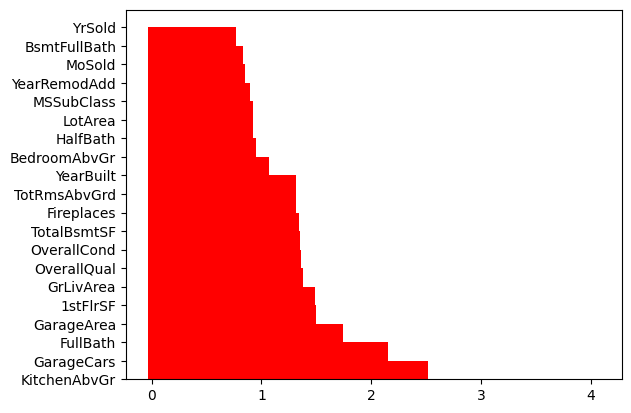

In [39]:
plt.figure()
plt.bar(selector.scores_[indices[range(k)]], features, color='r', align='center')
# plt.xticks(rotation=)
plt.show()